# Aula 01

In [1]:
# features (1 sim, 0 não)
# longo?
# perna curta?
# faz auau?
porco1 = [0,1,0]
porco2 = [0,1,1]
porco3 = [1,1,0]

cachorro1 = [0,1,1]
cachorro2 = [0,0,1]
cachorro3 = [1,1,1]

# 1=> porco, 2=> cachorro
treino_x = [porco1, porco2, porco3, cachorro1, cachorro2, cachorro3]
treino_y = [1,1,1,0,0,0] #labels

In [2]:
from sklearn.svm import LinearSVC

In [3]:
model = LinearSVC()
model.fit(treino_x, treino_y)

LinearSVC()

In [4]:
animal_misterioso = [1,1,1]
model.predict([animal_misterioso])

array([0])

In [5]:
misterio1 = [1,1,1]
misterio2 = [1,1,0]
misterio3 = [0,1,1]

teste_x = [misterio1, misterio2, misterio3]
teste_y = [0,1,1]

In [6]:
previsoes = model.predict(teste_x)

In [7]:
corretos = (previsoes == teste_y).sum()
total = len(teste_x)
taxa_de_acerto = corretos/total
print(f'Taxa de acerto: { taxa_de_acerto*100 :0.2f}%')

Taxa de acerto: 66.67%


In [8]:
from sklearn.metrics import accuracy_score

taxa_de_acerto = accuracy_score(teste_y, previsoes)
print(f'Taxa de acerto: { taxa_de_acerto*100 :0.2f}%')

Taxa de acerto: 66.67%


# Aula 02

In [10]:
import pandas as pd

dados = pd.read_csv('https://gist.githubusercontent.com/guilhermesilveira/2d2efa37d66b6c84a722ea627a897ced/raw/10968b997d885cbded1c92938c7a9912ba41c615/tracking.csv')
dados.head()

,home,how_it_works,contact,bought
0,1,1,0,0
1,1,1,0,0
2,1,1,0,0
3,1,1,0,0
4,1,1,0,0


In [23]:
x = dados.iloc[:,:3]
y = dados.iloc[:,-1]

In [24]:
dados.shape

(99, 4)

In [49]:
treino_x = x[:75]
treino_y = y[:75]
teste_x = x[75:]
teste_y = y[75:]

print(f'Treino será realizado com {len(treino_x)} e teste com {len(teste_x)} elementos')

Treino será realizado com 75 e teste com 24 elementos


In [50]:
modelo = LinearSVC()
modelo.fit(treino_x, treino_y)
previsoes = modelo.predict(teste_x)

taxa_de_acerto = accuracy_score(teste_y, previsoes)
print(f'A acurácia foi de {taxa_de_acerto*100 :0.2f}%')

A acurácia foi de 95.83%


## Usando biblioteca sklearn para realizar a separação

In [58]:
from sklearn.model_selection import train_test_split

SEED = 20

treino_x, teste_x, treino_y, teste_y = train_test_split(x,y ,random_state = SEED, test_size = 0.25)
print(f'Treino será realizado com {len(treino_x)} e teste com {len(teste_x)} elementos')

Treino será realizado com 74 e teste com 25 elementos


In [59]:
modelo = LinearSVC()
modelo.fit(treino_x, treino_y)
previsoes = modelo.predict(teste_x)

taxa_de_acerto = accuracy_score(teste_y, previsoes)
print(f'A acurácia foi de {taxa_de_acerto*100 :0.2f}%')

A acurácia foi de 96.00%


In [60]:
treino_y.value_counts()

0    47
1    27
Name: bought, dtype: int64

In [61]:
teste_y.value_counts()

0    19
1     6
Name: bought, dtype: int64

In [62]:
# A proporção de usuarios que comprou da que não comprou é mt distante

In [63]:
treino_x, teste_x, treino_y, teste_y = train_test_split(x,y ,random_state = SEED, 
                                                        test_size = 0.25,
                                                       stratify = y)
print(f'Treino será realizado com {len(treino_x)} e teste com {len(teste_x)} elementos')

modelo = LinearSVC()
modelo.fit(treino_x, treino_y)
previsoes = modelo.predict(teste_x)

taxa_de_acerto = accuracy_score(teste_y, previsoes)
print(f'A acurácia foi de {taxa_de_acerto*100 :0.2f}%')

Treino será realizado com 74 e teste com 25 elementos
A acurácia foi de 96.00%


In [64]:
treino_y.value_counts()

0    49
1    25
Name: bought, dtype: int64

In [65]:
teste_y.value_counts()

0    17
1     8
Name: bought, dtype: int64

# Aula 03

In [66]:
uri = 'https://gist.githubusercontent.com/guilhermesilveira/1b7d5475863c15f484ac495bd70975cf/raw/16aff7a0aee67e7c100a2a48b676a2d2d142f646/projects.csv'

dados = pd.read_csv(uri)
dados.head()

,unfinished,expected_hours,price
0,1,26,192
1,1,88,9015
2,1,89,2577
3,1,42,275
4,1,39,170


In [73]:
trocar = {
    0:1,
    1:0
}
dados['finished'] = dados.unfinished.map(trocar)
dados.tail()
dados.drop('unfinished', inplace=True, axis=1)

In [74]:
dados.tail()


,expected_hours,price,finished
2152,80,7518,1
2153,52,1332,0
2154,40,473,1
2155,75,5324,1
2156,37,377,0


<AxesSubplot:xlabel='expected_hours', ylabel='price'>

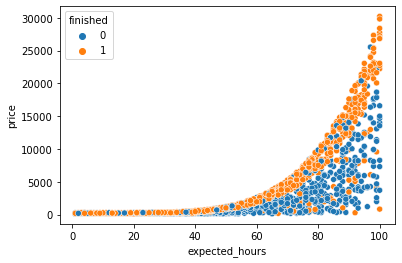

In [81]:
import seaborn as sns

sns.scatterplot(x ='expected_hours', y='price', data = dados, hue='finished')

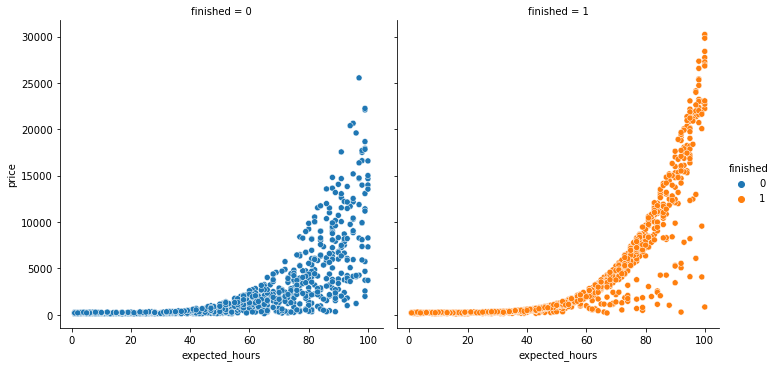

In [85]:
sns.relplot(x ='expected_hours', y='price',  col='finished',hue ='finished',data = dados)

In [86]:
x = dados[['expected_hours', 'price']]
y = dados['finished']

In [95]:
SEED = 20

treino_x, teste_x, treino_y, teste_y = train_test_split(x,y ,random_state = SEED, 
                                                        test_size = 0.25,
                                                       stratify = y)
print(f'Treino será realizado com {len(treino_x)} e teste com {len(teste_x)} elementos')

modelo = LinearSVC(dual = False)
modelo.fit(treino_x, treino_y)
previsoes = modelo.predict(teste_x)

taxa_de_acerto = accuracy_score(teste_y, previsoes)
print(f'A acurácia foi de {taxa_de_acerto*100 :0.2f}%')

Treino será realizado com 1617 e teste com 540 elementos
A acurácia foi de 54.44%


In [99]:
import numpy as np

previsoes_de_base = np.ones(540)

In [100]:
taxa_de_acerto = accuracy_score(teste_y, previsoes_de_base)
print(f'A acurácia do baseline foi de {taxa_de_acerto*100 :0.2f}%')

A acurácia do baseline foi de 52.59%


<AxesSubplot:xlabel='expected_hours', ylabel='price'>

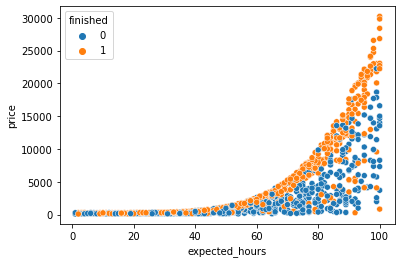

In [101]:
sns.scatterplot(x ='expected_hours', y='price', data = treino_x, hue=treino_y)

In [105]:
x_min = teste_x.expected_hours.min()
x_max = teste_x.expected_hours.max()

y_min = teste_x.price.min()
y_max = teste_x.price.max()

print(x_min, x_max, y_min, y_max)

1 100 101 27738


In [109]:
pixels = 100
eixo_x = np.arange(x_min, x_max, (x_max - x_min) / pixels)
eixo_y = np.arange(y_min, y_max, (y_max - y_min) / pixels)

In [115]:
xx, yy = np.meshgrid(eixo_x, eixo_y)
pontos = np.c_[xx.ravel(), yy.ravel()]
pontos

array([[1.000000e+00, 1.010000e+02],
       [1.990000e+00, 1.010000e+02],
       [2.980000e+00, 1.010000e+02],
       ...,
       [9.703000e+01, 2.746163e+04],
       [9.802000e+01, 2.746163e+04],
       [9.901000e+01, 2.746163e+04]])

In [118]:
z = modelo.predict(pontos)
z = z.reshape(xx.shape)
z

array([[1, 0, 0, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0],
       ...,
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1]], dtype=int64)

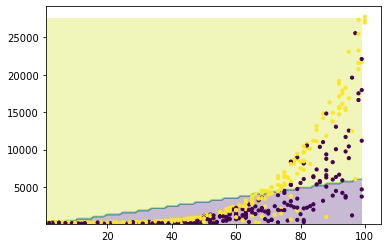

In [124]:
import matplotlib.pyplot as plt

plt.contourf(xx,yy,z, alpha = 0.3)
plt.scatter(teste_x.expected_hours, teste_x.price, c=teste_y, s=10)
plt.show()
# DECISION BOUNDARY

**O modelo LinearSVC tenta prever o resultado a partir de uma reta, porntanto gerouo uma linha de decisão incapaz de prever com eficácia os dados, acredito que o gráfico assemelha-se mais à uma função exponencial**

# Aula 04

Treino será realizado com 1617 e teste com 540 elementos
A acurácia foi de 55.19%


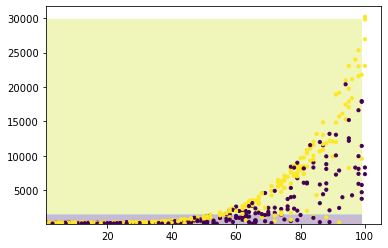

In [138]:
from sklearn.svm import SVC

SEED = 5

np.random.seed(SEED)

treino_x, teste_x, treino_y, teste_y = train_test_split(x,y, test_size = 0.25,
                                                       stratify = y)
print(f'Treino será realizado com {len(treino_x)} e teste com {len(teste_x)} elementos')

modelo = SVC()
modelo.fit(treino_x, treino_y)
previsoes = modelo.predict(teste_x)

taxa_de_acerto = accuracy_score(teste_y, previsoes)
print(f'A acurácia foi de {taxa_de_acerto*100 :0.2f}%')

x_min = teste_x.expected_hours.min()
x_max = teste_x.expected_hours.max()

y_min = teste_x.price.min()
y_max = teste_x.price.max()

pixels = 100
eixo_x = np.arange(x_min, x_max, (x_max - x_min) / pixels)
eixo_y = np.arange(y_min, y_max, (y_max - y_min) / pixels)

xx, yy = np.meshgrid(eixo_x, eixo_y)
pontos = np.c_[xx.ravel(), yy.ravel()]


z = modelo.predict(pontos)
z = z.reshape(xx.shape)

plt.contourf(xx,yy,z, alpha = 0.3)
plt.scatter(teste_x.expected_hours, teste_x.price, c=teste_y, s=10)
plt.show()




In [144]:
def linha_decisao(teste_x, modelo,teste_y):
    data_x = teste_x[:,0]
    data_y = teste_x[:,1]
    
    x_min = data_x.min()
    x_max = data_x.max()

    y_min = data_y.min()
    y_max = data_y.max()

    pixels = 100
    eixo_x = np.arange(x_min, x_max, (x_max - x_min) / pixels)
    eixo_y = np.arange(y_min, y_max, (y_max - y_min) / pixels)

    xx, yy = np.meshgrid(eixo_x, eixo_y)
    pontos = np.c_[xx.ravel(), yy.ravel()]


    z = modelo.predict(pontos)
    z = z.reshape(xx.shape)

    plt.contourf(xx,yy,z, alpha = 0.3)
    plt.scatter(data_x, data_y, c=teste_y, s=10)
    plt.show()

Treino será realizado com 1617 e teste com 540 elementos
A acurácia foi de 70.37%


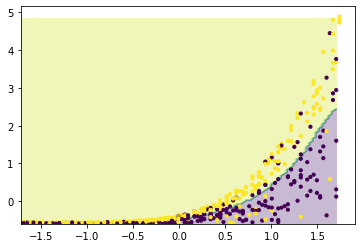

In [145]:
from sklearn.preprocessing import StandardScaler

SEED = 20

raw_treino_x, raw_teste_x, treino_y, teste_y = train_test_split(x,y ,random_state = SEED, 
                                                        test_size = 0.25,
                                                       stratify = y)
print(f'Treino será realizado com {len(raw_treino_x)} e teste com {len(raw_teste_x)} elementos')

scaler = StandardScaler()
scaler.fit(raw_treino_x)
treino_x = scaler.transform(raw_treino_x)
teste_x = scaler.transform(raw_teste_x)


modelo = SVC()
modelo.fit(treino_x, treino_y)
previsoes = modelo.predict(teste_x)

taxa_de_acerto = accuracy_score(teste_y, previsoes)
print(f'A acurácia foi de {taxa_de_acerto*100 :0.2f}%')

linha_decisao(teste_x, modelo, teste_y)